In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#parameters for Real NOK 70-30
r_0 = 0.0632
a_1 = -0.0375
a_2 = 1.1923
a_3 = -0.5069
b_1 = 1.0827
b_2 = -0.2950


std_r = 0.1389
std_x = 0.0171
std_f = 0.0218
cov_xf = 0.000148

r_mean = 0.03
mu = np.log(1+r_mean)

cov_e = [[std_r**2, 0, 0],
        [0, std_x**2, cov_xf],
        [0, cov_xf, std_f**2]]


In [3]:
#simulation

#generate errors
sample_size = 1000000
T = 40 #years
e = np.random.multivariate_normal([0,0,0], cov_e, (T, sample_size))

#
r = np.zeros((T, sample_size))
X = np.zeros((T, sample_size))
F = r = np.zeros((T, sample_size))

In [4]:
e.shape

(40, 1000000, 3)

In [5]:
#simulate the VAR
r = np.zeros((T, sample_size))
X = np.zeros((T, sample_size))
F = np.zeros((T, sample_size))

#first simulate r because it is independent
r = mu -.5*std_r**2 + e[:,:,0]# squared std even though it's not squared in specification
#then simulate X and F
#note that the first couple of values are taken from end of arrays
for t in range(T):
    X[t] = a_1*r[t-1] + a_2*X[t-1] + a_3*X[t-2] + e[t,:,1]
    F[t] = b_1*F[t-1] + b_2*F[t-2] + e[t,:,2]

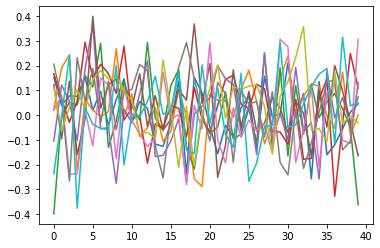

In [6]:
plt.plot(r[:,:10])

In [9]:
lambda_ = .5
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] + X[t] + F[t]
    
    

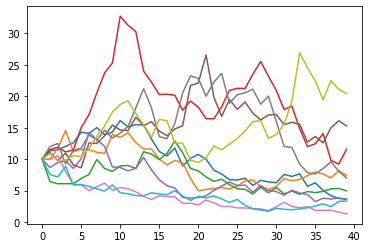

In [10]:
plt.plot(A[:,:10])

<AxesSubplot:ylabel='Count'>

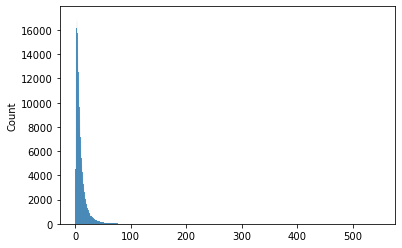

In [11]:
sns.histplot(A[-1,:])

In [12]:
des = pd.DataFrame(A[-1]).describe().T
des['depletion rate'] = (A[-1]==0).mean()

In [13]:
des.T

,0
count,1000000.000000
mean,9.598842
std,10.913759
min,0.000000
25%,3.370150
50%,6.354213
75%,11.814461
max,548.679878
depletion rate,0.001382


In [14]:
df = pd.DataFrame(index = ['5%', '25%', '50%', '75%', '95%', 'Depletion rate'])

In [15]:
lambda_ = 0
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] #+ X[t] + F[t]
    
df[r'$\lambda$=0, X=0,F=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), (A[-1]==0).mean()]

In [16]:
lambda_ = .5
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] #+ X[t] + F[t]
    
df[r'$\lambda$=0.5, X=0,F=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), (A[-1]==0).mean()]

In [17]:
lambda_ = 0
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] + X[t] #+ F[t]
    
df[r'$\lambda$=0,F=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), (A[-1]==0).mean()]

In [18]:
lambda_ = 0.5
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] + X[t] #+ F[t]
    
df[r'$\lambda$=0.5,F=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), (A[-1]==0).mean()]

In [19]:
lambda_ = 0
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] + X[t] + F[t]
    
df[r'$\lambda$=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), (A[-1]==0).mean()]

In [20]:
lambda_ = 0.5
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] + X[t] + F[t]
    
df[r'$\lambda$=0.5'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), (A[-1]==0).mean()]

In [21]:
df

,"$\lambda$=0, X=0,F=0","$\lambda$=0.5, X=0,F=0","$\lambda$=0,F=0","$\lambda$=0.5,F=0",$\lambda$=0,$\lambda$=0.5
5%,1.539643,1.394055,1.471646,1.324156,1.394556,1.241205
25%,3.669048,3.402544,3.659949,3.390810,3.639616,3.370150
50%,6.709423,6.305772,6.756353,6.350946,6.758437,6.354213
75%,12.245931,11.638665,12.394698,11.784409,12.422083,11.814461
95%,29.212203,28.132456,29.611666,28.531877,29.634180,28.564775
Depletion rate,0.000000,0.000000,0.000070,0.000122,0.000921,0.001382
